### emnas_winner_2 (experiment 21)
* best result of emnas
* sequence: [6, 41, 7, 43, 4, 16, 25, 39, 49]
* nas_acc: 0.896 nas_lat: 60.07 ms nas_reward: 0.9413 trained_acc: 0.9941, measured lat: 21.87
* model file generated by EMNAS
* Trained to get the actual accuracy

In [1]:
import numpy as np
import keras
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
plt.rcParams.update({'font.size': 14, 'mathtext.fontset': 'stix', 'font.family': 'STIXGeneral'})

In [3]:
batchSize = 6

In [9]:
model_epochs_full = 20
dataset_path_full = ".../dataset_openclose_678"

In [5]:
# [6, 41, 7, 43, 4, 16, 25, 39, 49]
mobile = keras.models.load_model("model_files/emnas_winner__exp_21.h5")

In [6]:
mobile.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 64, 64, 32)        128       
_________________________________________________________________
batch_normalization_82 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_82 (ReLU)              (None, 64, 64, 32)        0         
_________________________________________________________________
depthwise_conv2d_32 (Depthwi (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_83 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_83 (ReLU)              (None, 32, 32, 32)        0   

In [7]:
mobile.count_params()

37682

In [8]:
# datasets
dataGen = ImageDataGenerator(validation_split=0.1, 
                             preprocessing_function=keras.applications.mobilenet.preprocess_input)

trainBatch = dataGen.flow_from_directory(dataset_path_full, target_size=(128,128), batch_size=batchSize, subset='training')

validateBatch = dataGen.flow_from_directory(dataset_path_full, target_size=(128,128), batch_size=batchSize, subset='validation', shuffle=False)

Found 3893 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


In [10]:
mobile.fit_generator(trainBatch, steps_per_epoch=len(trainBatch), validation_data=validateBatch, validation_steps=len(validateBatch), epochs=model_epochs_full)

/home/amirhossein/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
649/649 [==============================] - 55s 79ms/step - loss: 0.4625 - accuracy: 0.7832 - val_loss: 0.6407 - val_accuracy: 0.5856
Epoch 2/20
649/649 [==============================] - 46s 72ms/step - loss: 0.3223 - accuracy: 0.8613 - val_loss: 0.5162 - val_accuracy: 0.7037
Epoch 3/20
649/649 [==============================] - 47s 73ms/step - loss: 0.2092 - accuracy: 0.9211 - val_loss: 0.1044 - val_accuracy: 0.9792
Epoch 4/20
649/649 [==============================] - 59s 91ms/step - loss: 0.1703 - accuracy: 0.9337 - val_loss: 0.1963 - val_accuracy: 0.9259
Epoch 5/20
649/649 [==============================] - 56s 87ms/step - loss: 0.1164 - accuracy: 0.9566 - val_loss: 0.0445 - val_accuracy: 0.9907
Epoch 6/20
649/649 [==============================] - 56s 86ms/step - loss: 0.0954 - accuracy: 0.9689 - val_loss: 0.6079 - val_accuracy: 0.7361
Epoch 7/20
649/649 [==============================] - 70s 107ms/step - loss: 0.0738 - accuracy: 0.9761 - val_loss: 0.0469 - val_accuracy

In [11]:
# mobile.save("emnas_winner_2__trained_openclose_678.h5")

In [12]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[212   1]
 [  1 218]]


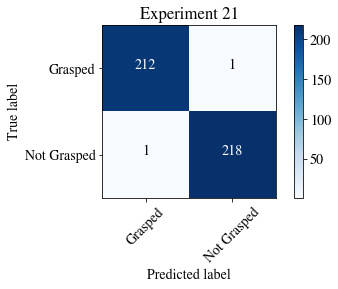

In [18]:
valLabels = validateBatch.classes
predictions = mobile.predict_generator(validateBatch, steps= len(valLabels)//batchSize+1)
cm = confusion_matrix(valLabels, predictions.argmax(axis=1))
cmPlotLabels = ['Grasped', 'Not Grasped']
plot_confusion_matrix(cm, cmPlotLabels, title='Experiment 21')

### Latency, accuracy - emnas_winner_2
* Predicted accuracy: 0.896
* Predicted latency: 60.07
* reward: 0.9413
* Measured latency: 21.87